# Exercices 10

[Télécharger l'exercice](../10_exercice.zip)


# Équation de la glace en 1D

L'objectif ici est de modéliser l'évolution d'un glacier synthétique (idéalisé) en resolvant l'équation de la glace en 1D. L'évolution de la géométrie d'un glacier / calotte glaciaire peut être approximée par un processus de diffusion non linéaire. L'équation de diffusion non linéaire en une dimension, qui prédit l'évolution de la géométrie d'une calotte glaciaire, est la suivante :

$$\frac{\partial h}{\partial t} = - \frac{\partial q_x}{\partial x} + b(s), \qquad (1)$$

$$q_x = - D(h) \frac{\partial s}{\partial x},$$

où $h$ est la hauteur de glace, $l$ est l'altitude du lit rocheux, $s = l+h$ est l'altitude de la surface de glace, $D(h)$ est la diffusivité dynamique de la glace, $b$ est le bilan de masse (accumulation moins ablation de glace en surface), $t$ est le temps, et $x$ est la distance le long du modèle.  

La non-linéarité dans la diffusion vient de la diffusivité dynamique $D(h)$, qui elle-même dépend de l'épaisseur locale de la glace $h$ et de la pente de sa surface :

$$D(h) = f_d (\rho g)^3 h^5 \left( \frac{\partial s}{\partial x} \right)^2,$$

où $f_d$ est une constante physique, $\rho$ est la densité de la glace, et $g$ est la constante de gravité. La diffusivité doit donc être mise à jour au cours du temps.

Le fonction "bilan de masse" est définit par la formule suivante

$$b(s) = \min ( b_\mathrm{grad} (s-s_\mathrm{ELA}), b_\mathrm{max} ).$$
 
ou $b_\mathrm{grad}$, $s_\mathrm{ELA}$, et $b_\mathrm{max}$ sont des paramètres.

Écrivez le code d'un modèle de glacier en 1D en discrétisant l'équation (1). Utilisez une épaisseur de glace initiale de 0 m. Comme conditions limites, fixez l'épaisseur de glace aux deux extrémités du modèle à une épaisseur de glace nulle. Les paramètres additionnels sont donnés dans la table suivante. Utilisez la fonction logarithmique suivante pour définir un lit rocheux synthétique :
 
$$l(x)  = 11522.8 - 1000 \times log(x + 1000).$$

Visualisez l'évolution temporelle des résultats du modèle dans une figure comme dans la figure suivante. 

Modifiez les paramètres de la fonction bilan de masse $b$, et explorez leur influence sur le résultat.
 
![](fig/sol_glacier_1D.png)

*Résultat du modèle de glacier 1D.*

| **Paramètres**                             | **Valeurs**                 |
|--------------------------------------------|-----------------------------|
| constante physique $ f_d $               | $1.0 \; 10^{-16} [Pa^{-3} yr^{-1}]$ |
| longueur du modèle $ L $                | 100 km                      |
| épaisseur initiale de la glace             | 0 m                         |
| pas de temps maximal $ dt_{max} $       | 1 y                         |
| densité de la glace $ \rho_{\mathrm{ice}} $ | 910 $kg/m^{3}$         |
| constante de gravité $ g $              | 9.81 $m s^{-2}$          |
| altitude de la ligne d'équilibre $ z_{\mathrm{ELA}} $ | 1200 m             |
| bilan de masse maximum $ b_{\mathrm{max}} $ | 0.3 m/yr                 |
| gradient du bilan de masse $ b_{\mathrm{grad}} $ | 0.001                  |
| temps total                                | 3000 y                     |

*Paramètres pour les exercices.*
 
### ✅ **À vous de faire !** 


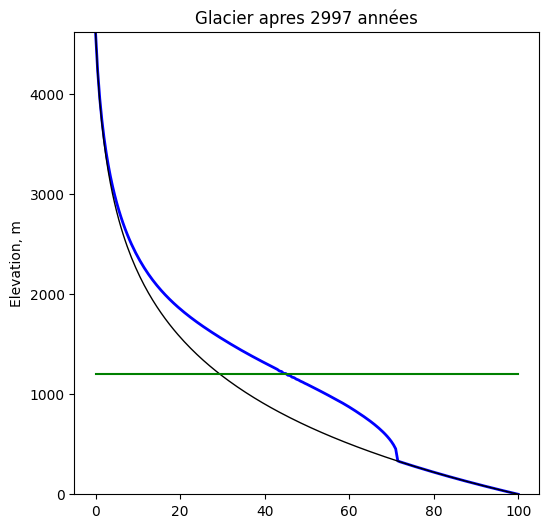

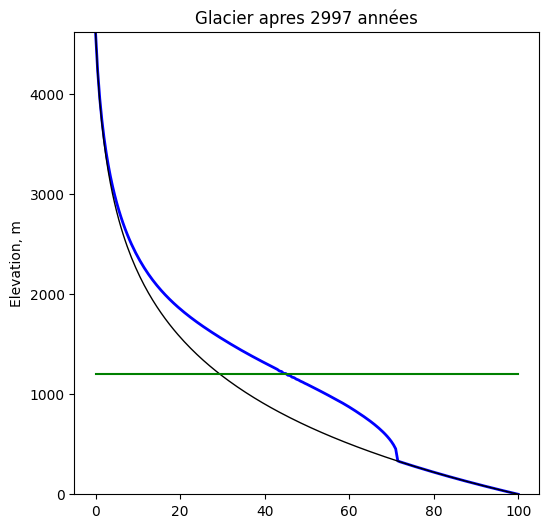

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display, clear_output

# Physics
b_max = 0.3  # maximum ice balance m/yr
grad_b = 0.001  # gradient of ice balance as a fonction of élévation. yr^-1

s_ELA = 1200  # equilibrium line altitude
Lx = 1e5  # model length, m
ttot = 3e3  # total time
rhog = 910 * 9.81  # ice density kg/m^3 * gravity m/s^{-2}
fd = 1e-16  # physical constant for ice diffusivity, Pa^3/y
kD = fd * rhog**3  # lump all constants for diffusivity toobtenirher

# Numerics
nx = 201  # number of cells
dx = Lx / (nx - 1)  # number of cells 
dtmax = 1      # initial dt, will be changed within boucle, yr
dt    = dtmax  # initial dt, will be changed within boucle, yr
x = np.linspace(0, Lx, nx)  # x-coordinates
nout = 100  # fréquence of tracerting

# Initialisation
l = - 1000 * np.log(x + 1000)  + 11522.8 # topography
h = np.zeros(nx)  # ice thickness 

s = l + h  # ice surface

time=0 # initialiser time
it=0 # initialiser itération compteur

fig, ax = plt.subplots(figsize=(6,6))
 
# Time boucle
while time < ttot:

    # calculer dHdt dû à diffusion
    h_av = 0.5 * (h[:-1] + h[1:])            # average height between cells (nx-1)
    D = kD * h_av**5 * ((s[1:] - s[:-1]) / dx)**2  # diffusivity (nx-1)
    qx = -D * (s[1:] - s[:-1]) / dx                # ice flux
    dHdt = - (qx[1:] - qx[:-1]) / dx                 # change in ice thickness from flow

    # mise à jour pas de temps as fonction of D
    dt = min(dtmax, dx**2 / (2.1 * np.max(D)))  # mise à jour pas de temps
    
    # mise à jour thickness of ice (iceflow)
    h[1:-1] += dt * dHdt                      

    # mise à jour ice thickness (mass balance)
    b = np.minimum(grad_b * (s - s_ELA), b_max) 
    h += dt * b

    h[h < 0] = 0  # définir any negative thickness to 0

    h[0] = 0  # condition aux limitess
    h[-1] = 0  # condition aux limitess

    s = l + h  # mise à jour ice surface
    time += dt  # mise à jour time

    it += 1 

    # Visualization
    if it % nout == 0:  

        clear_output(wait=True)  
        ax.cla()

        ax.plot(x / 1000, s, 'b', linewidth=2) 
        ax.plot(x / 1000, l, 'k', linewidth=1)
        ax.plot([x[0], x[-1] / 1000], [s_ELA, s_ELA], 'g')
        ax.set_ylim([np.min(l), np.max(l)])
        ax.set_ylabel('Elevation, m')
        ax.set_title('Glacier apres '+str(int(time)) + ' années') 

        display(fig)

